In [2]:
from sklearn import datasets, model_selection

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

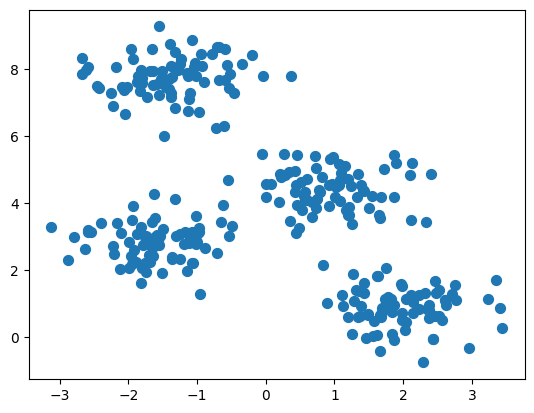

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

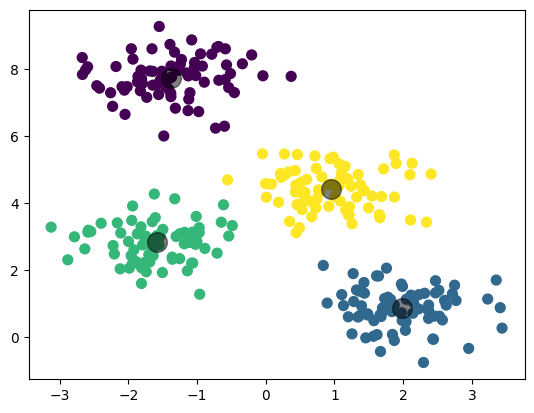

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) # создать модель
kmeans.fit(X) # обучить модель
y_kmeans = kmeans.predict(X) # определить метки классов
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_ # определить центры кластеров
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

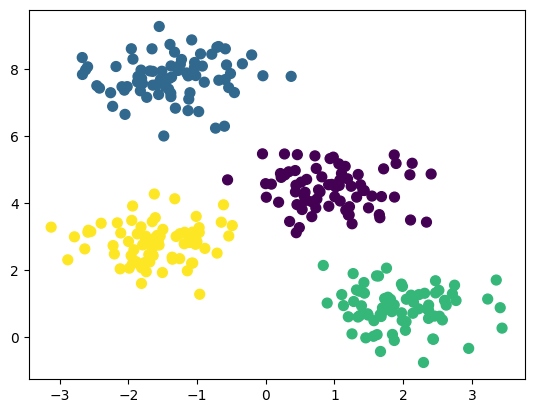

In [5]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed):
  # 1. Случайным образом заполняем кластеры
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters] # выбрать случайно индексы центров кластеров
  centers = X[i]
  while True:
  # 2a. Определяем метки класса объекта исходя из информации о ближайшем центре
    labels = pairwise_distances_argmin(X, centers)
  # 2b. Находим новые центры кластеров
    new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)]) # mean(0) вычисляет среднее значение столбца
  # 2c. Проверяем сходимость (перестали ли центры меняться)
    if np.all(centers == new_centers): break
    centers = new_centers

  return centers, labels

centers, labels = find_clusters(X, 4, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Выберите k= 4


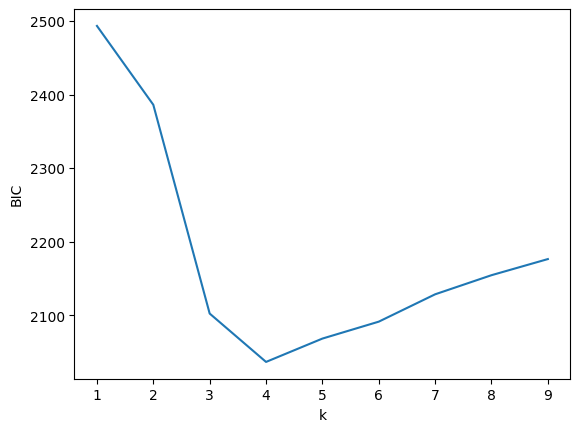

In [6]:
from sklearn.mixture import GaussianMixture

bic = list()
ks = np.arange(1, 10)
for k in ks:
  gmm = GaussianMixture(n_components=k, covariance_type='full') # создание модели смести Гаусса
  gmm.fit(X) # обучение модели
  bic.append(gmm.bic(X)) # Вычисление Баесовского Информационного Критерия (BIC)

k_chosen = ks[np.argmin(bic)]
plt.plot(ks, bic)
plt.xlabel("k")
plt.ylabel("BIC")
print("Выберите k=", k_chosen)

In [7]:
bic

[2493.362856418551,
 2386.109200199695,
 2102.1937651666112,
 2036.412507969132,
 2068.155183841925,
 2091.1774513273103,
 2128.3705111320533,
 2154.3565451484537,
 2176.281982684647]

In [9]:
dataset = pd.read_csv(f"Data/toi/Mall_Customers.csv")

In [10]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
X = np.array(pd.DataFrame(dataset, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

Выберите k= 5


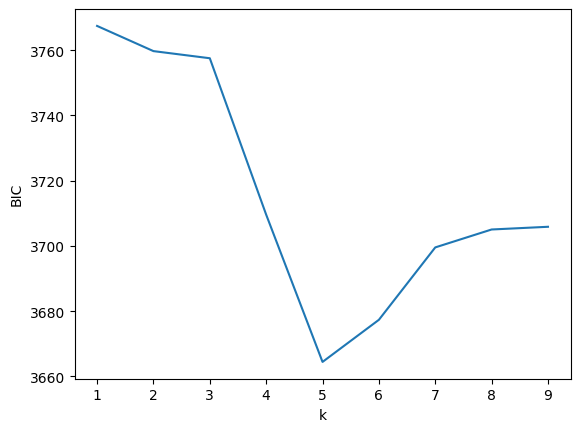

In [12]:
bic = list()
ks = np.arange(1, 10)
for k in ks:
  gmm = GaussianMixture(n_components=k, covariance_type='full')
  gmm.fit(X)
  bic.append(gmm.bic(X))

k_chosen = ks[np.argmin(bic)]
plt.plot(ks, bic)
plt.xlabel("k")
plt.ylabel("BIC")
print("Выберите k=", k_chosen)

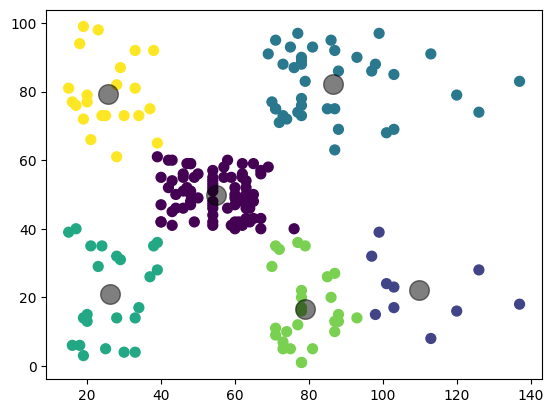

In [13]:
kmeans = KMeans(n_clusters=6) # создать модель
kmeans.fit(X) # обучить модель
y_kmeans = kmeans.predict(X) # определить метки классов
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_ # определить центры кластеров
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

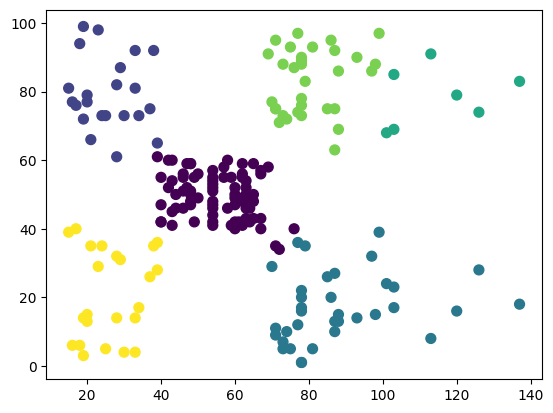

In [14]:
centers, labels = find_clusters(X, 6, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


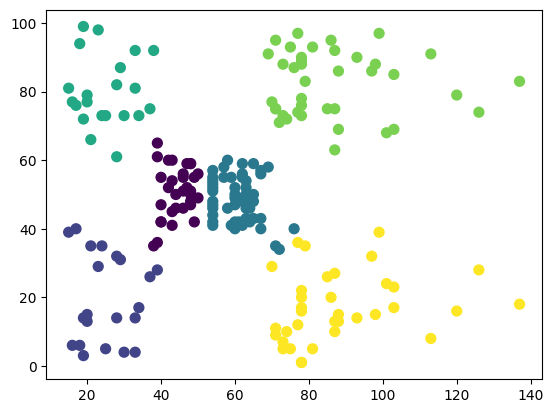

In [15]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', assign_labels='kmeans') # создать модель
labels = model.fit_predict(X) # обучить модель и определить метки классов
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')